# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I had an appalling experie...
1,"Not Verified | Good points, the cabin crew, t..."
2,"Not Verified | It was a decent flight, reason..."
3,✅ Trip Verified | I really like flying Briti...
4,✅ Trip Verified | Could not book online the ...


In [10]:
import os

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

# Save the DataFrame to CSV
df.to_csv("data/BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [12]:
print(df.head())

                                             reviews
0  ✅ Trip Verified |   I had an appalling experie...
1  Not Verified |  Good points, the cabin crew, t...
2  Not Verified |  It was a decent flight, reason...
3  ✅ Trip Verified |   I really like flying Briti...
4  ✅ Trip Verified |   Could not book online the ...


In [14]:
# Remove specific phrases from the 'reviews' column
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified |", "", regex=False)
df['reviews'] = df['reviews'].str.replace("Not Verified |", "", regex=False)

# Optionally, remove any leading or trailing whitespace
df['reviews'] = df['reviews'].str.strip()

# Save the cleaned DataFrame to a new CSV file
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

In [16]:
print(df.head())

                                             reviews
0  I had an appalling experience with British Air...
1  Good points, the cabin crew, they were helpful...
2  It was a decent flight, reasonable comfortable...
3  I really like flying British Airways particula...
4  Could not book online the night before because...


In [18]:
df['reviews'] = df['reviews'].str.lower()


In [20]:
import string
df['reviews'] = df['reviews'].str.translate(str.maketrans('', '', string.punctuation))


In [22]:
df['reviews'] = df['reviews'].str.replace(r'\d+', '', regex=True)


In [24]:
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.replace(r'\s+', ' ', regex=True)


In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shriyakumbhoje/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shriyakumbhoje/nltk_data...


In [30]:
df['reviews'] = df['reviews'].str.encode('ascii', 'ignore').str.decode('ascii')


In [32]:
print(df.head())

                                             reviews
0  appalling experience british airway started tr...
1  good point cabin crew helpful professional mat...
2  decent flight reasonable comfortable seat pilo...
3  really like flying british airway particularly...
4  could book online night system arrived early a...


In [46]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [44]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shriyakumbhoje/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shriyakumbhoje/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

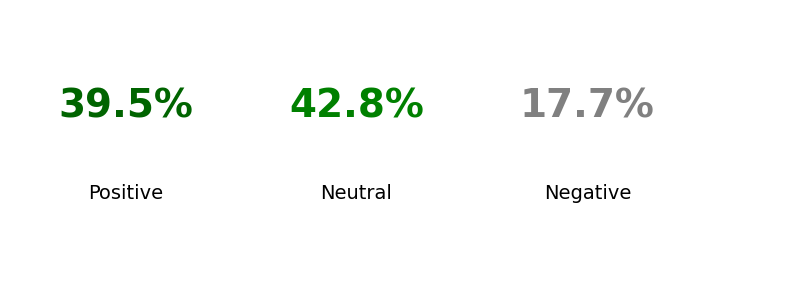

In [106]:
import matplotlib.pyplot as plt

# Your KPI values
kpis = {
    'Positive': (395, 39.5, 'darkgreen'),
    'Neutral': (428, 42.8, 'green'),
    'Negative': (177, 17.7, 'gray')
}

# Create figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')  # Hide axes

# Plot each KPI as colored text
x_positions = [0.15, 0.45, 0.75]
for (label, (count, percent, color)), x in zip(kpis.items(), x_positions):
    ax.text(x, 0.6, f"{percent}%", color=color, fontsize=28, fontweight='bold', ha='center')
    ax.text(x, 0.3, label, color='black', fontsize=14, ha='center')

# Save or show
plt.tight_layout()
plt.savefig('data/sentiment_kpis.png', dpi=300)
plt.show()




In [56]:
#So number of Neutral reviews are 400+ 
#number of positive reviewS are 350+ 
#negative reviews between 150 to 200 

In [80]:
#Topic Modelling 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Step 1: Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)  # Increase min_df to reduce noise
dtm = vectorizer.fit_transform(df['reviews'])

# Step 2: Fit the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Try 3 topics
lda.fit(dtm)

# Step 3: Show top words per topic
print("Top words per topic:")
for i, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")



Top words per topic:
Topic 1: airway, british, hour, time, customer, staff, service, airline, flight, ba
Topic 2: london, service, customer, airway, british, told, day, hour, ba, flight
Topic 3: business, service, time, class, food, crew, good, ba, seat, flight


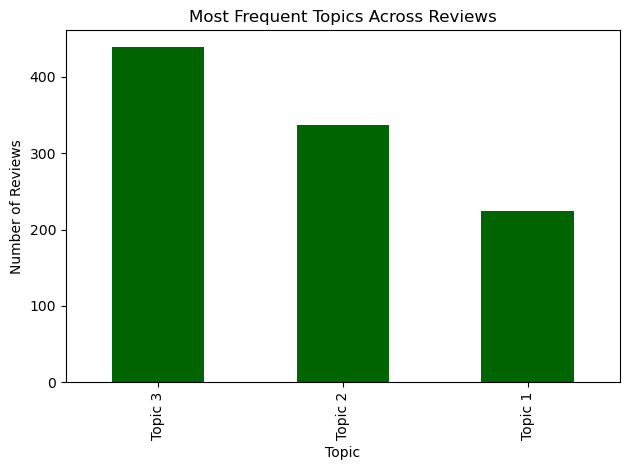

In [94]:
topic_distribution = lda.transform(dtm)
df_topics = pd.DataFrame(topic_distribution, columns=[f'Topic {i+1}' for i in range(lda.n_components)])

# Attach most dominant topic to each review
df['dominant_topic'] = df_topics.idxmax(axis=1)

# Visualize topic counts
df['dominant_topic'].value_counts().plot(kind='bar', color='darkgreen')
plt.title('Most Frequent Topics Across Reviews')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('data/topic_distribution.png')
plt.show()


In [86]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


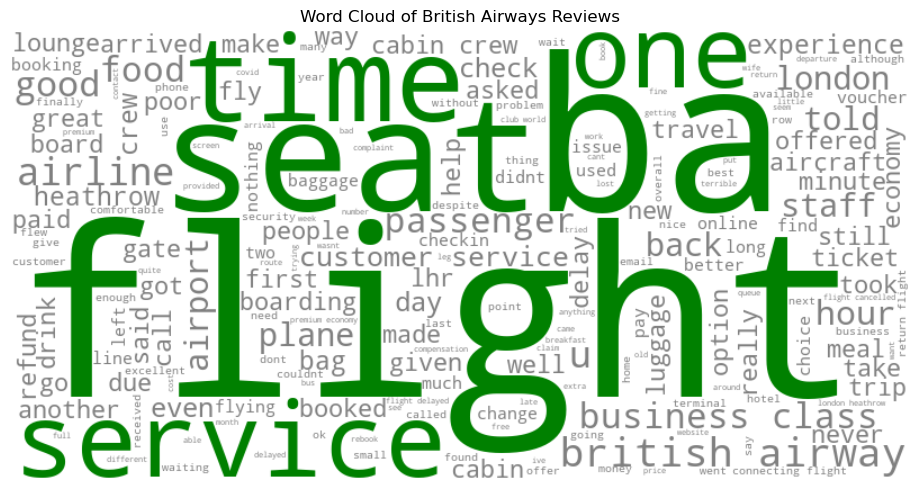

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dark green for big words → grey for small words
def green_to_gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Define threshold: above this font size is green, below is gray
    threshold = 50  # adjust as needed based on actual word sizes

    if font_size >= threshold:
        return "hsl(120, 100%, 25%)"  # dark green
    else:
        return "hsl(0, 0%, 50%)"  # neutral grey

# Generate word cloud
text = ' '.join(df['reviews'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=green_to_gray_color_func
).generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Reviews')
plt.tight_layout()
plt.savefig('data/wordcloud.png')
plt.show()




